In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, excel file I/O (e.g. pd.read_excel)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
df = pd.read_excel('Industri2018-2019.xlsx', header=None)

In [3]:
# Menghapus Index ke-0
df = df.drop([0])

# Menghapus Index
df = df.reset_index(drop=True)
df.columns = ['Nim','Nama','Prodi','Lama Penulisan','SKS','IPK','TOEFL','Kelas']

In [4]:
df.head()

,Nim,Nama,Prodi,Lama Penulisan,SKS,IPK,TOEFL,Kelas
0,1800019089,Umi Tri Utami,Teknik Industri,1.9,149,3.87,489,Tepat Waktu
1,1800019262,Bayu Pamungkas Wibisono,Teknik Industri,1.566667,149,3.56,486,Tepat Waktu
2,1800019181,Rizki Almuhaymin,Teknik Industri,5.133333,149,3.6,462,Tepat Waktu
3,1800019068,Reza Varensia,Teknik Industri,2.266667,149,3.53,464,Tepat Waktu
4,1800019170,Riza Fakhrizal Romandhan,Teknik Industri,5.966667,149,3.6,506,Tepat Waktu


In [5]:
df.shape

(147, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Nim             147 non-null    object
 1   Nama            147 non-null    object
 2   Prodi           147 non-null    object
 3   Lama Penulisan  147 non-null    object
 4   SKS             147 non-null    object
 5   IPK             147 non-null    object
 6   TOEFL           147 non-null    object
 7   Kelas           147 non-null    object
dtypes: object(8)
memory usage: 9.3+ KB


In [7]:
df.isnull().values.any()

False

In [8]:
ket = {"Tepat Waktu" : 0, "Tidak Tepat Waktu" : 1}
df["Kelas"] = df["Kelas"].map(ket)

In [9]:
df['Kelas'].value_counts()

Kelas
0    86
1    61
Name: count, dtype: int64

In [10]:
print('Tepat Waktu', round(df['Kelas'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Tidak Tepat Waktu', round(df['Kelas'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Tepat Waktu 58.5 % of the dataset
Tidak Tepat Waktu 41.5 % of the dataset


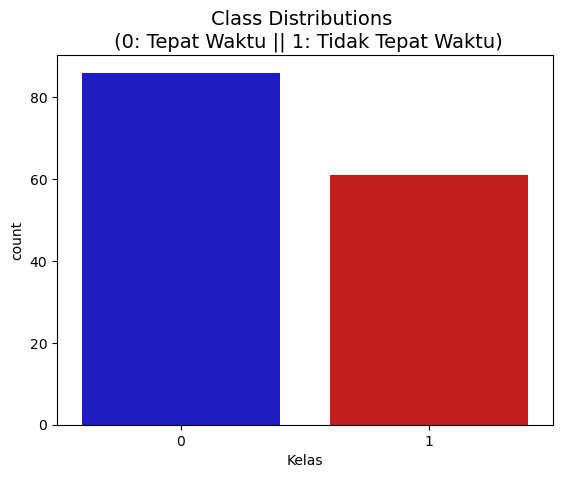

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = ["#0101DF", "#DF0101"]
sns.countplot(x='Kelas', data=df, palette=colors)
plt.title('Class Distributions \n (0: Tepat Waktu || 1: Tidak Tepat Waktu)', fontsize=14)
plt.show()

In [12]:
# Class count
count_class_0, count_class_1 = df.Kelas.value_counts()

# Divide by class
df_class_0 = df[df['Kelas'] == 0]
df_class_1 = df[df['Kelas'] == 1]

Random over-sampling:
Kelas
0    86
1    86
Name: count, dtype: int64


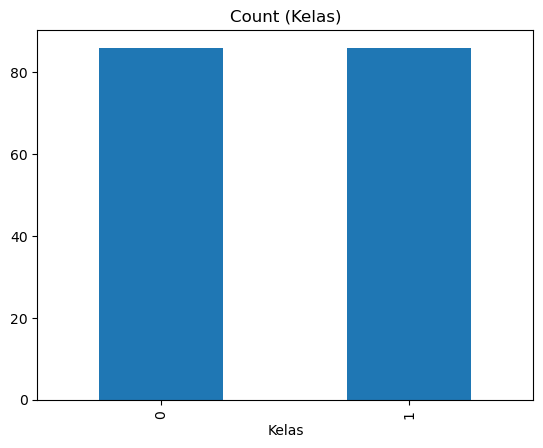

In [13]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Kelas.value_counts())

df_test_over.Kelas.value_counts().plot(kind='bar', title='Count (Kelas)');

In [14]:
x = df[['Lama Penulisan', 'SKS', 'IPK', 'TOEFL']]
y = df['Kelas']

In [15]:
from sklearn.ensemble import RandomForestClassifier

validation_size = 0.20
num_trees = 10

# Pisahkan data menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=validation_size, shuffle=False, random_state=None)

In [16]:
# Inisialisasi model Random Forest dengan parameter yang disetel secara manual
model = RandomForestClassifier(
    n_estimators=num_trees,
    max_depth=10,
    min_samples_split=3,
    min_samples_leaf=2
)

In [17]:
model = RandomForestClassifier(n_estimators=num_trees, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [18]:
# Prediksi pada data latih
y_train_pred = model.predict(x_train)

# Prediksi pada data uji
y_test_pred = model.predict(x_test)

In [19]:
# Hitung confusion matrix pada data latih
from sklearn.metrics import confusion_matrix
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

In [20]:
# Hitung akurasi pada data latih
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train, y_train_pred)

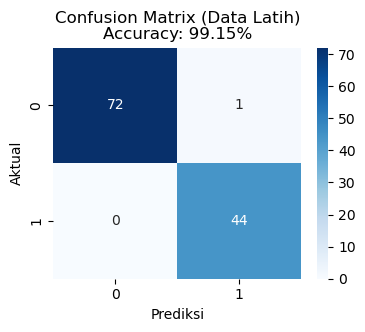

In [21]:
# Visualisasi confusion matrix pada data latih
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title(f'Confusion Matrix (Data Latih)\nAccuracy: {accuracy_train:.2%}')
plt.show()

In [22]:
# Hitung confusion matrix pada data uji
from sklearn.metrics import confusion_matrix
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

In [23]:
# Hitung akurasi pada data uji
from sklearn.metrics import accuracy_score
accuracy_test = accuracy_score(y_test, y_test_pred)

In [24]:
# Ekstraksi nilai dari confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
tn, fp, fn, tp = conf_matrix_test.ravel()

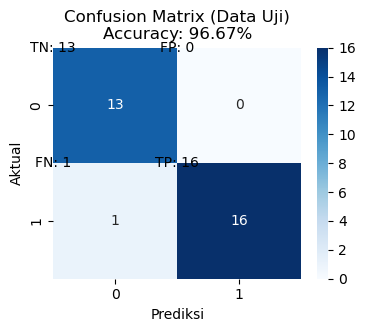

In [25]:
# Visualisasi confusion matrix pada data uji dengan penekanan pada True Positive dan False Negative
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])

# Menambahkan label untuk True Positive dan False Negative
plt.text(0, 0, f'TN: {tn}', horizontalalignment='center', verticalalignment='center')
plt.text(0, 1, f'FN: {fn}', horizontalalignment='center', verticalalignment='center')
plt.text(1, 0, f'FP: {fp}', horizontalalignment='center', verticalalignment='center')
plt.text(1, 1, f'TP: {tp}', horizontalalignment='center', verticalalignment='center')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title(f'Confusion Matrix (Data Uji)\nAccuracy: {accuracy_test:.2%}')
plt.show()

In [26]:
df_new = pd.read_excel('industri20.xlsx')

In [27]:
# Menghapus Index
df_new = df_new.reset_index(drop=True)
df_new.columns = ['nim','nama','prodi','Lama Penulisan','SKS','IPK','TOEFL','Kelas']
def_status = 0
df_new.fillna(def_status, inplace = True)
df_new

,nim,nama,prodi,Lama Penulisan,SKS,IPK,TOEFL,Kelas
0,2000019002,Fadli Surya Gumilar,Teknik Industri,6,127,3.37,495,0.0
1,2000019005,Ricky Yahya Wijaya,Teknik Industri,6,126,2.63,480,0.0
2,2000019007,Muhammad Daffa Aditya Feriandi,Teknik Industri,8,110,1.64,484,0.0
3,2000019008,Bachtiar Fauzi Hidayat,Teknik Industri,7,128,2.58,523,0.0
4,2000019009,Winda Yogista,Teknik Industri,8,109,1.89,480,0.0
...,...,...,...,...,...,...,...,...
113,2000019175,Lubis,Teknik Industri,7,125,1.78,430,0.0
114,2000019176,Achmad Prasetyo,Teknik Industri,7,130,3.25,420,0.0
115,2000019177,Adhitya Chandra Saputra,Teknik Industri,7,124,3.46,478,0.0
116,2015019072,Triyatno,Teknik Industri,7,127,3.57,500,0.0


In [28]:
# Mapping kelas menjadi 0 (Tepat Waktu) dan 1 (Tidak Tepat Waktu)
ket = {"Tepat Waktu": 0, "Tidak Tepat Waktu": 1}
df_new["Kelas"] = df_new["Kelas"].map(ket)

In [29]:
# Membuat data training
data2 = df_new.loc[:, ['Lama Penulisan', 'SKS', 'IPK', 'TOEFL']]
X_new = data2

In [30]:
# Prediksi menggunakan model Random Forest yang telah dilatih
predictions_new = model.predict(X_new)

In [31]:
# Mapping hasil prediksi menjadi label yang sesuai
hasil_prediksi = pd.Series(predictions_new).map({0: "Tepat Waktu", 1: "Tidak Tepat Waktu"})

In [32]:
# Menambahkan kolom Hasil ke dataset_new
df_new['Hasil'] = hasil_prediksi

In [33]:
# Menampilkan hasil prediksi
print("Prediksi untuk dataset baru:")
print(df_new[['nim','nama','prodi','Lama Penulisan', 'SKS', 'IPK', 'TOEFL', 'Hasil']])

Prediksi untuk dataset baru:
            nim                            nama            prodi  \
0    2000019002             Fadli Surya Gumilar  Teknik Industri   
1    2000019005              Ricky Yahya Wijaya  Teknik Industri   
2    2000019007  Muhammad Daffa Aditya Feriandi  Teknik Industri   
3    2000019008          Bachtiar Fauzi Hidayat  Teknik Industri   
4    2000019009                   Winda Yogista  Teknik Industri   
..          ...                             ...              ...   
113  2000019175                           Lubis  Teknik Industri   
114  2000019176                 Achmad Prasetyo  Teknik Industri   
115  2000019177         Adhitya Chandra Saputra  Teknik Industri   
116  2015019072                        Triyatno  Teknik Industri   
117  2015019077                    Budi Santoso  Teknik Industri   

     Lama Penulisan  SKS   IPK  TOEFL              Hasil  
0                 6  127  3.37    495        Tepat Waktu  
1                 6  126  2.63    48

In [34]:
# Hitung nilai kelas
class_counts = df_new.Hasil.value_counts()

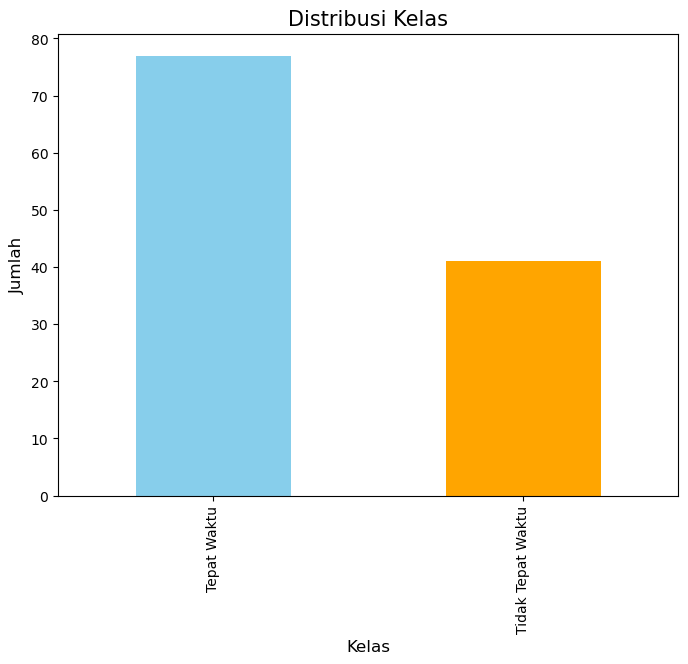

In [35]:
# Buat plot bar
plt.figure(figsize=(8,6))
class_counts.plot(kind='bar', color=['skyblue', 'orange'])
# Beri judul dan label sumbu
plt.title('Distribusi Kelas', fontsize=15)
plt.xlabel('Kelas', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Tampilkan plot
plt.show()

In [36]:
# Simpan model ke dalam file menggunakan pickle
import pickle
with open('ind.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)